## **Clasificación de Imagenes en Keras con una CNN**## 


In [1]:
import numpy as np                  
import matplotlib.pyplot as plt      
import random                       

from keras.datasets import mnist     # MNIST dataset is included in Keras

from keras.utils import np_utils                         
from tensorflow import keras

Cargar datos de entrenamiento

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Visualizar las imagenes

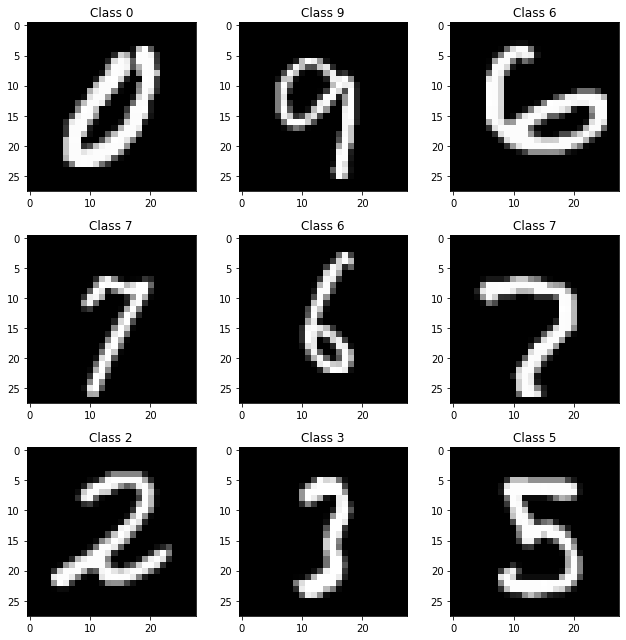

In [3]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

Imagenes como matriz

In [4]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(X_train[num])

0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    0   46  192  192  192  144  144  144  144  144  144   72   22    0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   16  227  253  253  253  253  253  254  253  253  253  253  227   15  0  0  0  0  0  0  
0  0  0  0  0  0  0  0   23  253  253  253  253  253  253  254  253  253  253  253  253   22  0  0  0  0  0  0  
0  0  0  0  0  0  0  0    1  112  253  243   10   10   10   11   40  121  178  159   83    1  0 

Cada pixel de la imagen es una entrada de la red neuronal por lo que el tensor de entrada es de dimension (60000,784)

In [5]:
#X_train = X_train.reshape(60000, 784) 
#X_test = X_test.reshape(10000, 784)   

X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

X_train /= 255                       
X_test /= 255

print("Dimensiones Matrices de Entrenamiento", X_train.shape)
print("Dimensiones Matrices de Validación", X_test.shape)

Dimensiones Matrices de Entrenamiento (60000, 28, 28)
Dimensiones Matrices de Validación (10000, 28, 28)


In [6]:
print(X_train[10])
print(y_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Para la clasificacion es necesario el one-hot format

In [7]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [8]:
print(y_train[10])
print(Y_train[10])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


Construccion de la Red

In [9]:
modelo = keras.models.Sequential()
modelo.add(keras.layers.Conv2D(16, (3, 3),padding='same' ,input_shape=(28, 28, 1),use_bias=False))
modelo.add(keras.layers.Activation("relu"))
modelo.add(keras.layers.MaxPooling2D((2, 2)))
modelo.add(keras.layers.Conv2D(32, (3, 3), padding='same',use_bias=False))
modelo.add(keras.layers.Activation("relu"))
modelo.add(keras.layers.MaxPooling2D((2, 2)))
modelo.add(keras.layers.Conv2D(64, (3, 3),padding='same',use_bias=False))
modelo.add(keras.layers.Activation("relu"))
modelo.add(keras.layers.Flatten())
modelo.add(keras.layers.Dense(10, activation='softmax'))

modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        144       
                                                                 
 activation (Activation)     (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4608      
                                                                 
 activation_1 (Activation)   (None, 14, 14, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                    

In [10]:
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Entrenando el modelo

In [11]:
historia=modelo.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
469/469 [==============================] - 54s 112ms/step - loss: 0.2478 - accuracy: 0.9277
Epoch 2/5
469/469 [==============================] - 47s 100ms/step - loss: 0.0611 - accuracy: 0.9810
Epoch 3/5
469/469 [==============================] - 47s 99ms/step - loss: 0.0416 - accuracy: 0.9876
Epoch 4/5
469/469 [==============================] - 45s 96ms/step - loss: 0.0329 - accuracy: 0.9897
Epoch 5/5
469/469 [==============================] - 46s 98ms/step - loss: 0.0259 - accuracy: 0.9921


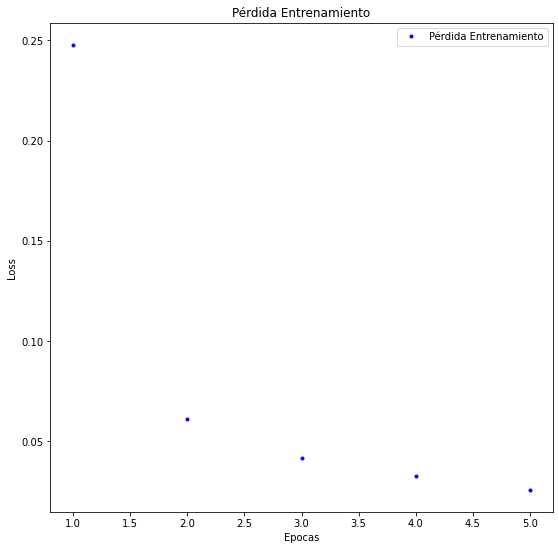

In [12]:
perdida_train = historia.history['loss']
epocas = range(1, len(perdida_train) + 1)

plt.plot(epocas, perdida_train, 'b.', label='Pérdida Entrenamiento')
plt.title('Pérdida Entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

Evaluando el modelo

In [13]:
Metricas= modelo.evaluate(X_test, Y_test)
print('Pérdida (Loss) de validación:', Metricas[0])
print('Precición (accuracy) de validación:', Metricas[1])

313/313 [==============================] - 4s 12ms/step - loss: 0.0337 - accuracy: 0.9894
Pérdida (Loss) de validación: 0.03367283195257187
Precición (accuracy) de validación: 0.9894000291824341


Verificando la salida

In [14]:
predicted_classes_Temp = modelo.predict(X_test)
predicted_classes =np.argmax(predicted_classes_Temp, axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

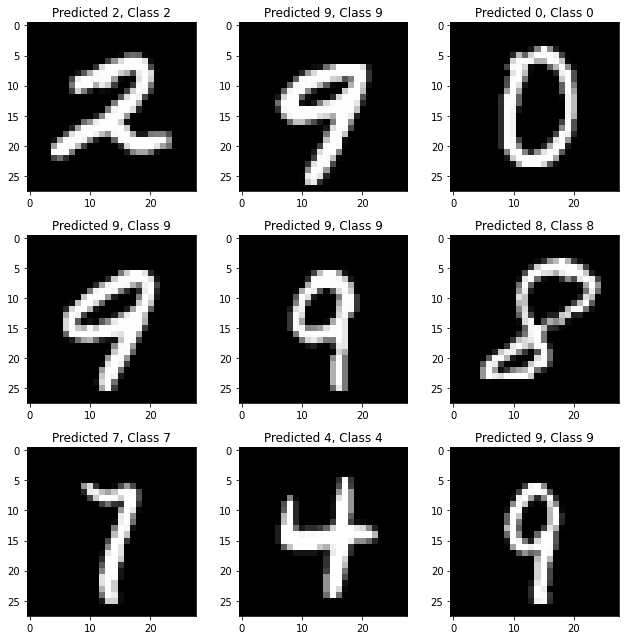

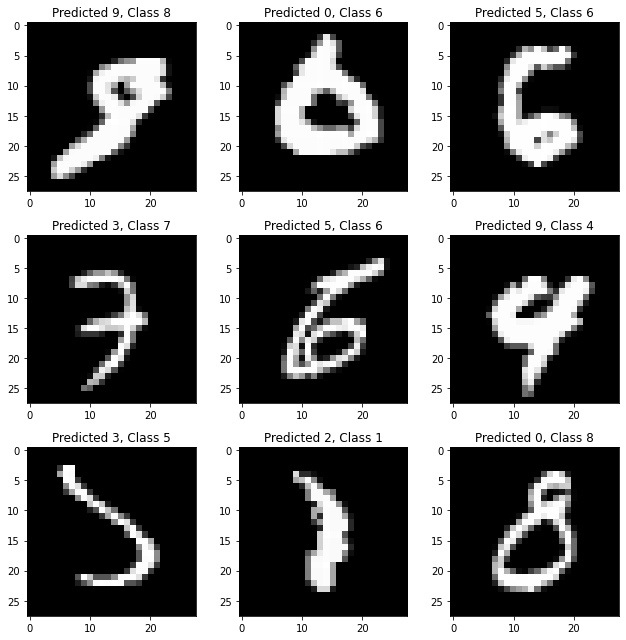

In [15]:
plt.figure()
Indices_Correctos=np.random.permutation(9900)
for i, correct in enumerate(correct_indices[Indices_Correctos[:9]]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()

Indices_Incorrectos=np.random.permutation(100)
plt.figure()
for i, incorrect in enumerate(incorrect_indices[Indices_Incorrectos[:9]]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.97      0.98       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1125    2    3    0    0    1    2    2    0]
 [   3    0 1025    0    0    0    0    3    1    0]
 [   0    0    0 1006    0    1    0    1    2    0]
 [   0    0    0    0  975   

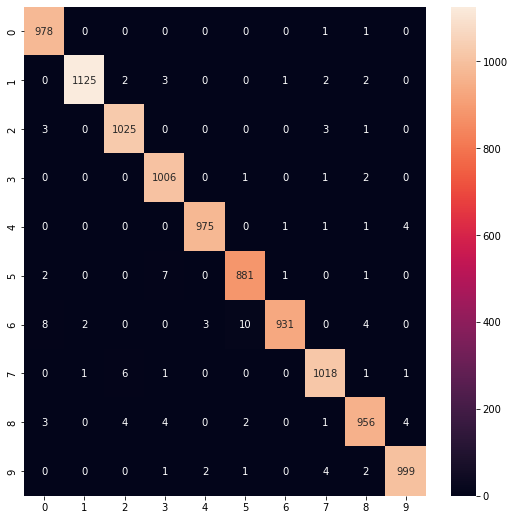

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
#import matplotlib.pyplot as plt
import pandas as pd

#y_test_class = np.argmax(y_test,axis=1) # convert encoded labels into classes: say [0, 0, 1] -->  [2] i.e Iris-virginica
y_pred_class = predicted_classes # convert predicted labels into classes: say [0.00023, 0.923, 0.031] -->  [1] i.e. Iris-versicolor
y_test_class = y_test
#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")